### Linear Regression Example : Covid 2021

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("dataset/date_count.csv")
df.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [10]:
df.isnull().sum()

Date     0
count    0
dtype: int64

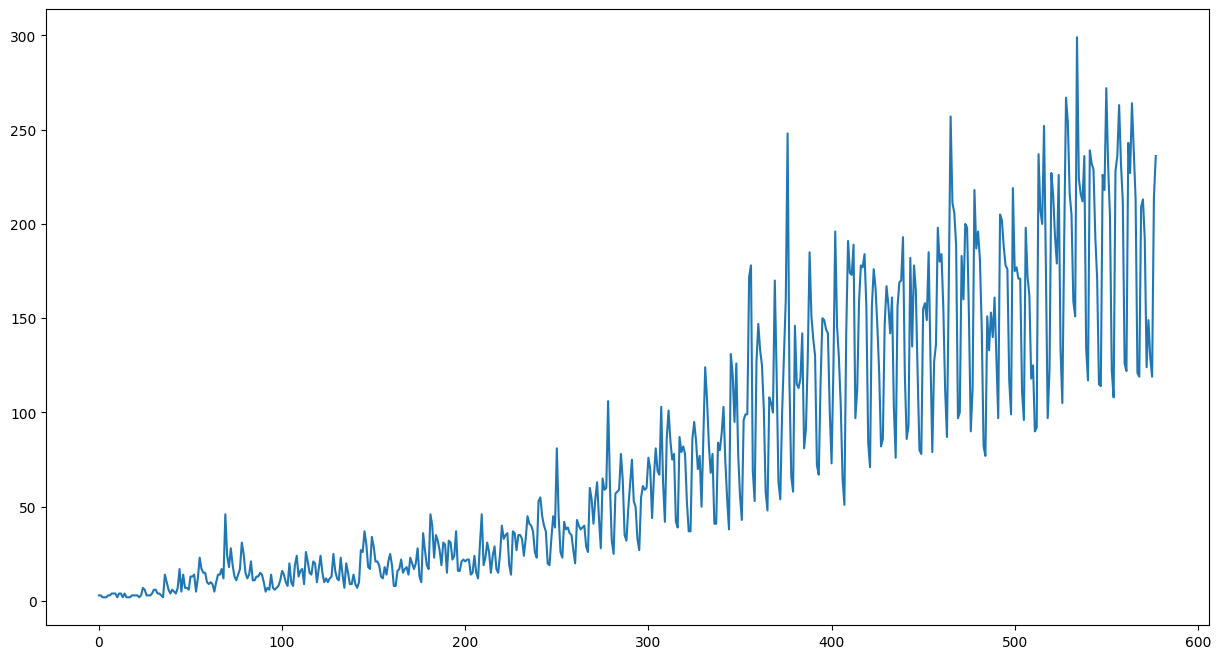

In [12]:
plt.figure(figsize=(15,8))
plt.plot(df['count'])
plt.show()

In [13]:
df['Date'] = df.index

In [14]:
df['Date'] = df[('Date')].values.astype("float64")

In [15]:
column = ['Date', 'count']
X = df[column]
y = df['count']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(X_train)
x_test_norm = mms.transform(X_test)

In [20]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
df['Prediction'] = model.predict(X)

<Figure size 1500x800 with 0 Axes>

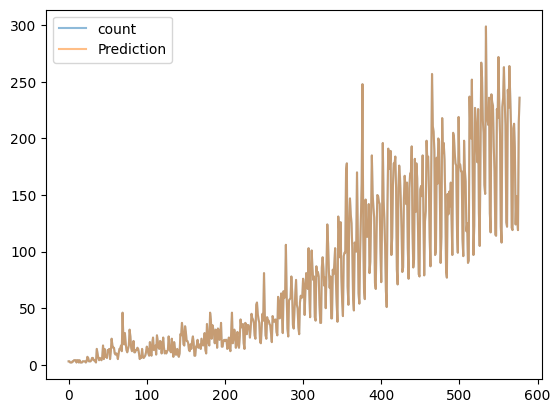

In [21]:
plt.figure(figsize=(15, 8))
df[['count', 'Prediction']].plot(alpha=0.5)
plt.show()

In [22]:
params = pd.Series(model.coef_, index = X.columns)
params

Date    -3.537665e-17
count    1.000000e+00
dtype: float64

In [23]:
print("model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)

model slope:  -3.537664899691719e-17
model intercept:  0.0


In [24]:
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.0001


In [25]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error', verbose=1)

,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,1.0


In [26]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014757,0.020712,0.002556,0.000747,0.0001,{'alpha': 0.0001},-6.274740e-09,-6.638319e-09,-8.913094e-09,-6.464721e-09,...,-6.653489e-09,1.272570e-09,1,-6.529671e-09,-6.619387e-09,-6.908804e-09,-6.426479e-09,-6.330164e-09,-6.562901e-09,1.983538e-10
1,0.004000,0.000633,0.003799,0.001720,0.0010,{'alpha': 0.001},-6.274694e-08,-6.638342e-08,-8.913122e-08,-6.464712e-08,...,-6.653492e-08,1.272579e-08,2,-6.529624e-08,-6.619410e-08,-6.908825e-08,-6.426469e-08,-6.330187e-08,-6.562903e-08,1.983600e-09
2,0.006303,0.002085,0.003801,0.001166,0.0100,{'alpha': 0.01},-6.274691e-07,-6.638349e-07,-8.913127e-07,-6.464714e-07,...,-6.653494e-07,1.272580e-07,3,-6.529620e-07,-6.619417e-07,-6.908828e-07,-6.426471e-07,-6.330190e-07,-6.562905e-07,1.983608e-08
3,0.005203,0.001477,0.002401,0.000491,0.0500,{'alpha': 0.05},-3.137345e-06,-3.319174e-06,-4.456563e-06,-3.232357e-06,...,-3.326747e-06,6.362900e-07,4,-3.264810e-06,-3.309708e-06,-3.454414e-06,-3.213235e-06,-3.165095e-06,-3.281452e-06,9.918035e-08
4,0.003996,0.000632,0.002402,0.000488,0.1000,{'alpha': 0.1},-6.274689e-06,-6.638348e-06,-8.913124e-06,-6.464712e-06,...,-6.653493e-06,1.272580e-06,5,-6.529618e-06,-6.619415e-06,-6.908826e-06,-6.426470e-06,-6.330188e-06,-6.562904e-06,1.983606e-07


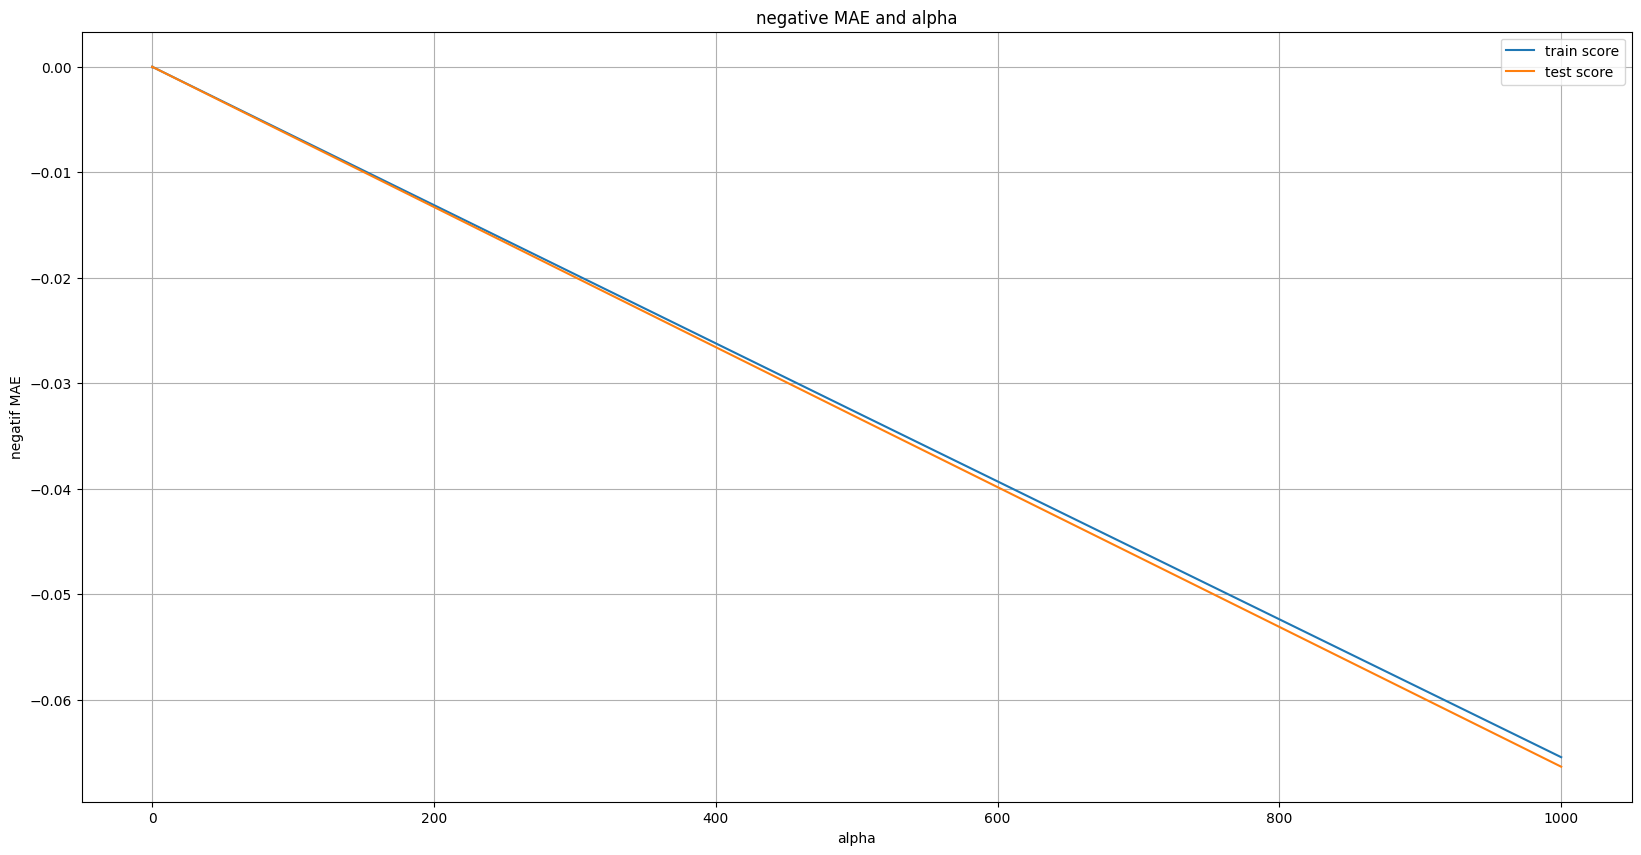

In [27]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('negatif MAE')
plt.title('negative MAE and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [28]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]

<Figure size 2000x1000 with 0 Axes>

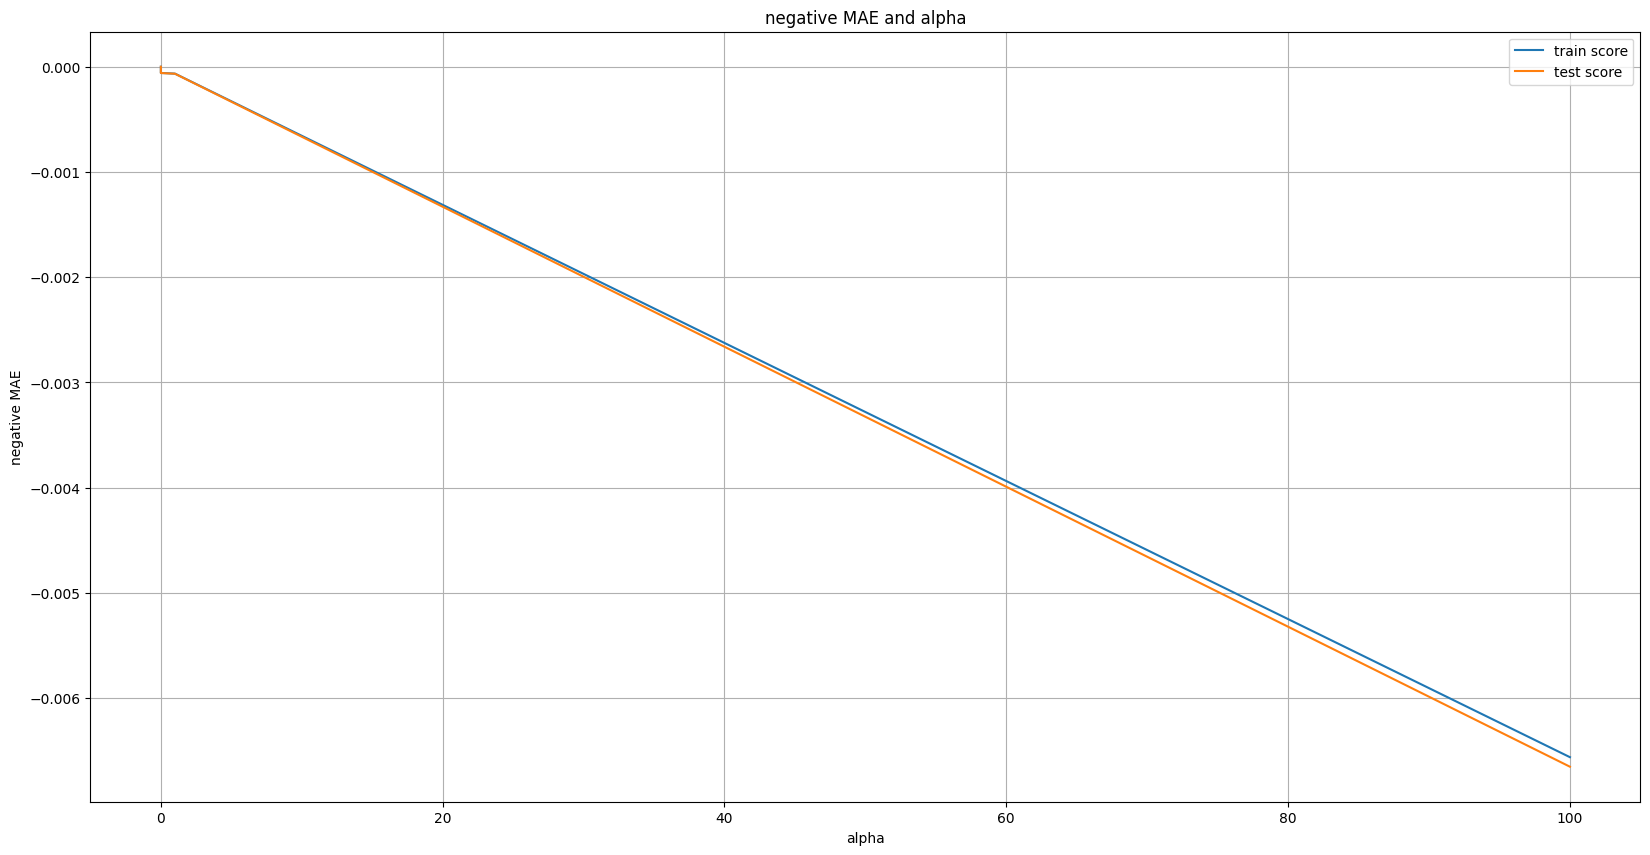

In [29]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('negative MAE')
plt.title('negative MAE and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [30]:
alpha = 15
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([1.11719012e-05, 9.99970460e-01])

In [31]:
imp_ridge = pd.DataFrame({
    "varname" : X.columns,
    "coefficient" : ridge.coef_
    })
imp_ridge.sort_values(by = "coefficient", ascending=False)

,varname,coefficient
1,count,0.999970
0,Date,0.000011


In [33]:
y_pred = ridge.predict(X_test)

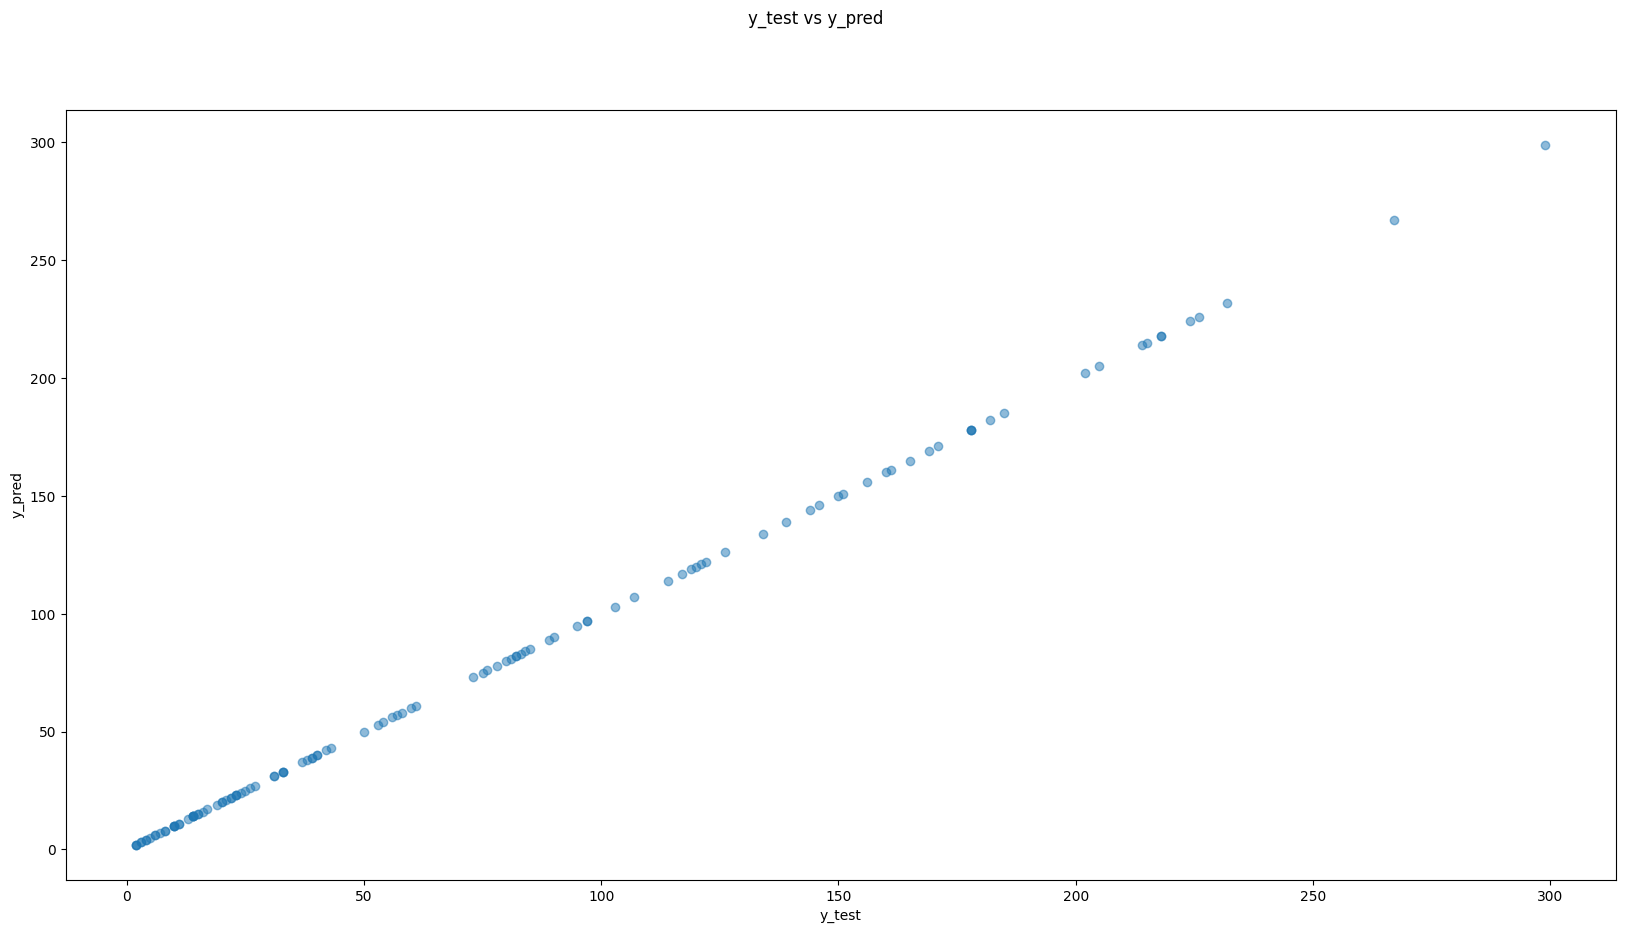

In [34]:
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha= .5)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [35]:
df = pd.DataFrame({'Actual' : y_test, 'Predictions' : y_pred})
df['Predictions'] = round(df['Predictions'], 2)
df

,Actual,Predictions
493,202,202.0
518,97,97.0
436,156,156.0
322,37,37.0
206,15,15.0
...,...,...
92,7,7.0
240,53,53.0
21,3,3.0
497,117,117.0


In [36]:
metrics.explained_variance_score(y_test, y_pred)

0.9999999997591115

In [37]:
metrics.mean_absolute_error(y_test, y_pred)

0.0009125978262829804

In [38]:
metrics.max_error(y_test, y_pred)

0.0037629083926731255

In [39]:
metrics.mean_squared_error(y_test, y_pred)

1.2559422893920965e-06

In [40]:
metrics.r2_score(y_test, y_pred)

0.9999999997576696

In [41]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]
lasso_gscv = GridSearchCV(estimator= Lasso(),
                          param_grid= {'alpha': alpha,
                                       'max_iter': max_iter},
                          scoring = 'neg_mean_absolute_error',
                          cv = 5, refit = False)

In [42]:
lasso_gscv.fit(X, y)
lasso_gscv.best_params_

{'alpha': 0.0001, 'max_iter': 100}

In [43]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'],
              max_iter=  lasso_gscv.best_params_['max_iter'])
lasso.fit(X_train, y_train)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,100
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [44]:
print("train set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))

train set score: 1.00
test set score: 1.00


### Advanced Linear Regression with Statsmodels

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_excel("Dataset/telco_customer_churn.xlsx", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1869, 33)
['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [58]:
data['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [59]:
commitment_map = {
    'Month-to-month': 'Short-Term',
    'One year': 'Long-Term',
    'Two year': 'Long-Term'
}

data['Commitment Level'] = data['Contract'].map(commitment_map)

print(data[['Contract', 'Commitment Level']].head())

         Contract Commitment Level
0  Month-to-month       Short-Term
1  Month-to-month       Short-Term
2  Month-to-month       Short-Term
3  Month-to-month       Short-Term
4  Month-to-month       Short-Term


In [61]:
data['Churn Label'].value_counts()

Churn Label
Yes    1869
Name: count, dtype: int64

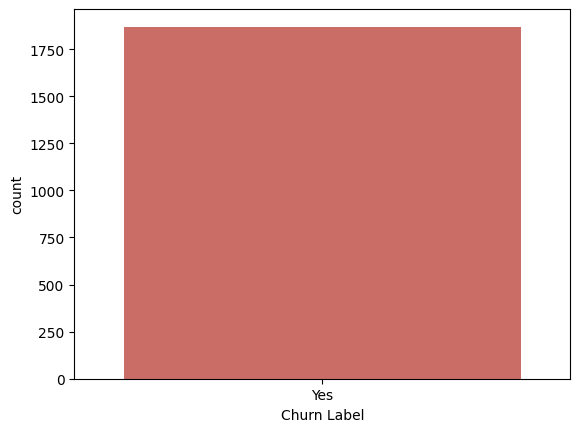

<Figure size 640x480 with 0 Axes>

In [64]:
sns.countplot(x='Churn Label', data=data, palette='hls')
plt.show()
plt.savefig('Output_Week3_HandsOn/count_plot')

In [ ]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subs: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subs: ", pct_of_sub*100)

percentage of no subs:  88.73458288821988
percentage of subs:  11.265417111780131


<Figure size 640x480 with 0 Axes>

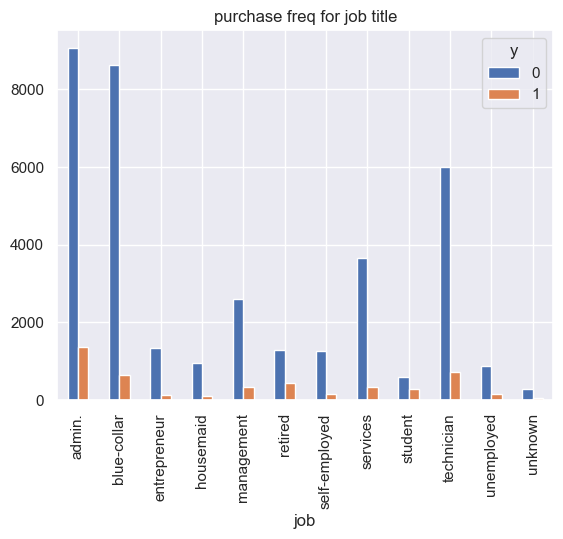

In [ ]:
%matplotlib inline
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('purchase freq for job title')
plt.xlabel('job')
plt.savefig('Output_Week3_Material/purchase_fre_job')
plt.show()

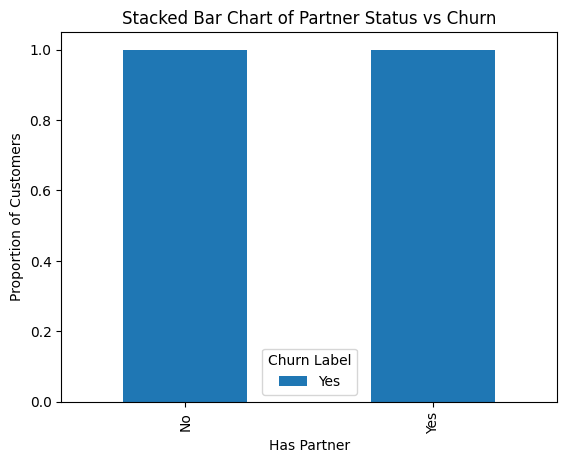

In [66]:
table = pd.crosstab(data.Partner, data['Churn Label'])

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.title('Stacked Bar Chart of Partner Status vs Churn')
plt.xlabel('Has Partner')
plt.ylabel('Proportion of Customers')
plt.savefig('Output_week3_handson/partner_vs_churn_stack.png')
plt.show()

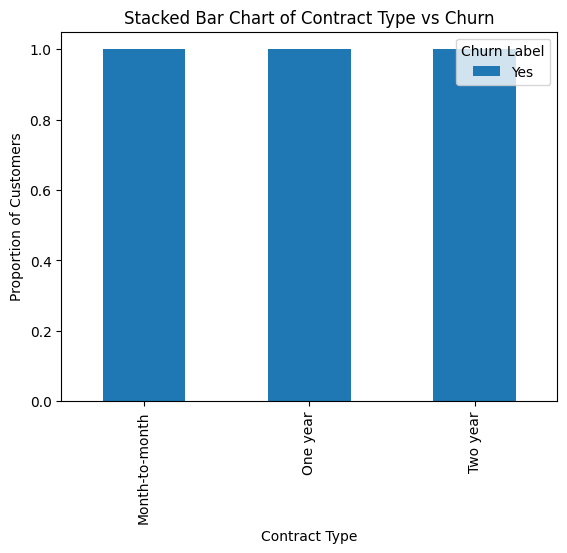

In [70]:
table = pd.crosstab(data.Contract, data['Churn Label'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Proportion of Customers')
plt.savefig('Output_Week3_handson/contract_vs_churn_stack')
plt.show()

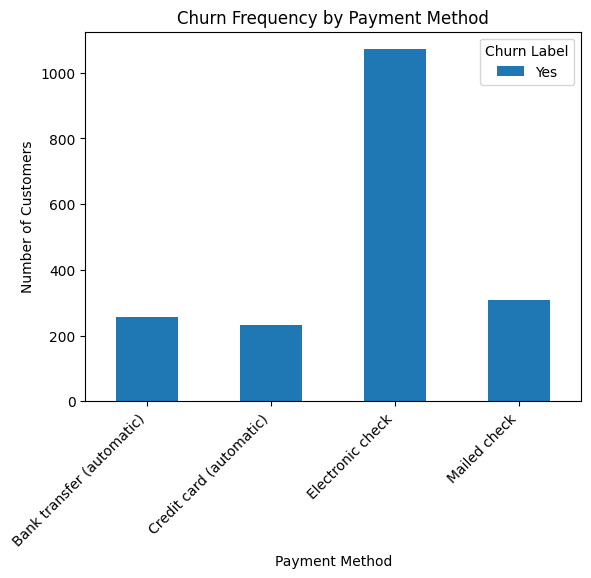

In [71]:
table = pd.crosstab(data['Payment Method'], data['Churn Label'])
table.plot(kind='bar')
plt.title('Churn Frequency by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right') 
plt.savefig('Output_week3_handson/payment_method_vs_churn_freq.png')
plt.show()

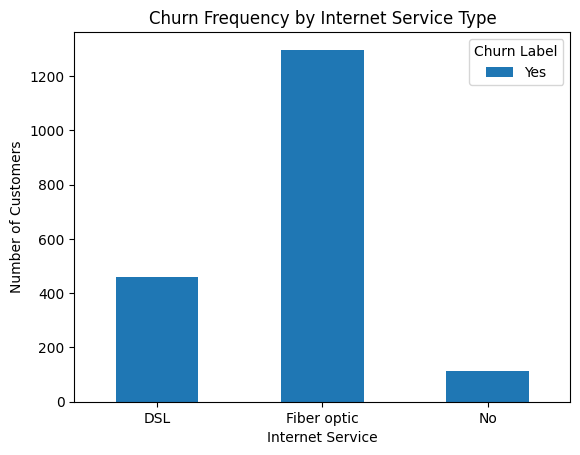

In [72]:
table = pd.crosstab(data['Internet Service'], data['Churn Label'])
table.plot(kind='bar')
plt.title('Churn Frequency by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) 
plt.savefig('output_week3_handson/internet_service_vs_churn_freq.png')
plt.show()

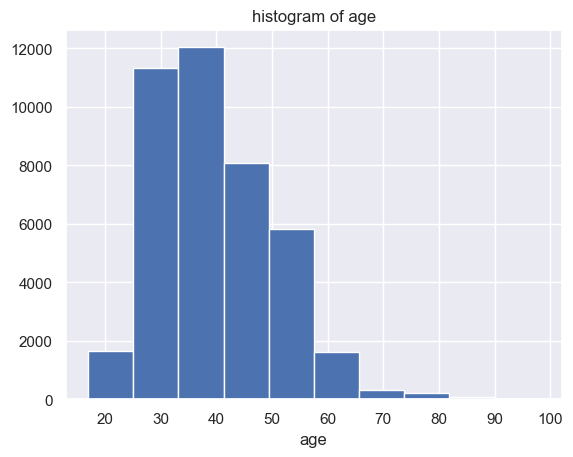

In [ ]:
data.age.hist()
plt.title('histogram of age')
plt.xlabel('age')
plt.savefig('Output_Week3_Material/hist_age')
plt.show()

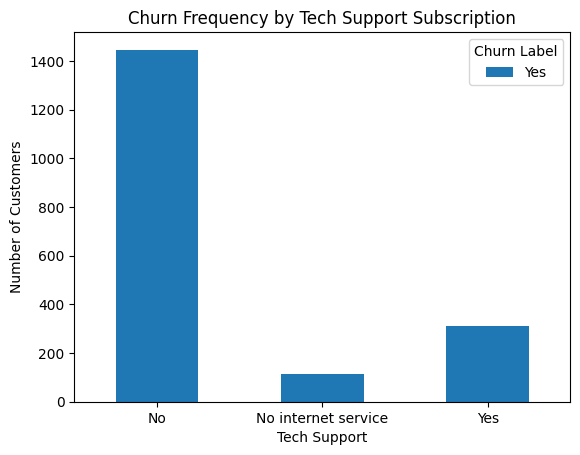

In [73]:
table = pd.crosstab(data['Tech Support'], data['Churn Label'])
table.plot(kind='bar')
plt.title('Churn Frequency by Tech Support Subscription')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.savefig('output_week3_handson/tech_support_vs_churn_freq.png')
plt.show()

In [74]:
cat_vars = ['Gender', 'Partner', 'Dependents', 'Phone Service', 
            'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
            'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Paperless Billing', 'Payment Method']

In [76]:
data_final = pd.get_dummies(data, columns=cat_vars, drop_first=True, dtype=int)

print(data_final.columns.values)

['CustomerID' 'Count' 'Country' 'State' 'City' 'Zip Code' 'Lat Long'
 'Latitude' 'Longitude' 'Senior Citizen' 'Tenure Months' 'Monthly Charges'
 'Total Charges' 'Churn Label' 'Churn Value' 'Churn Score' 'CLTV'
 'Churn Reason' 'Commitment Level' 'Gender_Male' 'Partner_Yes'
 'Dependents_Yes' 'Phone Service_Yes' 'Multiple Lines_No phone service'
 'Multiple Lines_Yes' 'Internet Service_Fiber optic' 'Internet Service_No'
 'Online Security_No internet service' 'Online Security_Yes'
 'Online Backup_No internet service' 'Online Backup_Yes'
 'Device Protection_No internet service' 'Device Protection_Yes'
 'Tech Support_No internet service' 'Tech Support_Yes'
 'Streaming TV_No internet service' 'Streaming TV_Yes'
 'Streaming Movies_No internet service' 'Streaming Movies_Yes'
 'Contract_One year' 'Contract_Two year' 'Paperless Billing_Yes'
 'Payment Method_Credit card (automatic)'
 'Payment Method_Electronic check' 'Payment Method_Mailed check']
